In [ ]:
from algen._function import _Function

In [ ]:
def add(a, b, c):
    return a + b + c

In [ ]:
res = make_function(
    "add",
    add,
    3,
)
res 

In [ ]:
res.get_arity(), res.get_name(), res.get_function()

In [ ]:
res(1, 2, 3)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a general tree using DiGraph
tree = nx.DiGraph()

# Add nodes and edges
tree.add_edges_from([
    ("A", "B"),  # A is the root, B is a child
    ("A", "C"),  # C is another child of A
    ("B", "D"),  # D is a child of B
    ("B", "E"),  # E is another child of B
    ("C", "F"),  # F is a child of C
    ("C", "G")   # G is another child of C
])

# Draw the tree
pos = nx.spring_layout(tree)  # Layout for visualization
nx.draw(tree, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=15)
plt.title("General Tree")
plt.show()


In [ ]:
type(tree) == nx.DiGraph

In [ ]:
import re

In [ ]:
expression = "add(sub(1, 2), 3)"

In [ ]:
tokens = re.findall(r"[A-Za-z_]\w*|\d+\.\d+|\d+|[-+*/()]", expression)
tokens

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a more complex DiGraph
G = nx.DiGraph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("C", "A"), ("B", "D")])

# Positioning nodes using the spring layout
pos = nx.spring_layout(G)

# Draw nodes, edges, and labels with different styles
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=11, font_color='black', font_weight='bold')

# Show the graph
plt.title("Directed Graph")
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import networkx as nx

def graph_to_tree_string(G: nx.DiGraph, node: str, indent: str = "") -> str:
    """Recursively convert the DiGraph to a string representation of a tree."""
    tree_str = f"{indent}{node}\n"
    
    # Get the children (successors) of the current node
    successors = list(G.successors(node))
    
    # Recursively format the children
    for child in successors:
        tree_str += graph_to_tree_string(G, child, indent + "    ")
    
    return tree_str

# Example usage
G = nx.DiGraph()

# Adding nodes and edges to the graph
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F")])

# Choose a root node to start the tree representation
root_node = "A"

# Convert the graph to a tree string
tree_string = graph_to_tree_string(G, root_node)

# Print the tree string
print(tree_string)


In [ ]:
import networkx as nx

def graph_to_string_with_edges_custom(G: nx.DiGraph, root: str, level: int = 0, prefix: str = "") -> str:
    """
    Converts a DiGraph (or tree) into a string representation that includes edges and custom formatting.
    
    Parameters:
    - G: DiGraph (the directed graph)
    - root: str (the root node to start the representation from)
    - level: int (indentation level for the current node, used for recursion)
    - prefix: str (prefix to be added for edge indentation, passed during recursion)
    
    Returns:
    - string representation of the tree with edges
    """
    result = " " * level * 4 + f"{root} -> "  # Indentation adjusted by 4 spaces
    children = list(G.neighbors(root))  # Get all children of the current node
    
    if not children:  # If no children, just show the node and None
        result += "None"
    else:
        # Show each child in the format "parent -> child1, child2, ..."
        result += ", ".join(children)
    
    result += "\n"
    
    # Recursively call for each child node to include their edges with custom prefixes
    for i, child in enumerate(children):
        child_prefix = "|---" if i == 0 else "-----"  # Adjust for first and subsequent children
        result += prefix + child_prefix + graph_to_string_with_edges_custom(G, child, level + 1, prefix + "     ")

    return result


# Example usage
G = nx.DiGraph()

# Adding nodes and edges to form a tree structure
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F")])

# Specify the root node
root_node = "A"

# Get the string representation of the tree with custom edges
tree_string = graph_to_string_with_edges_custom(G, root_node)

# Output the tree string
print(tree_string)


In [ ]:
import networkx as nx

def graph_to_string_with_edges(G: nx.DiGraph, root: str, level: int = 0) -> str:
    """
    Converts a DiGraph (or tree) into a string representation that includes edges.
    
    Parameters:
    - G: DiGraph (the directed graph)
    - root: str (the root node to start the representation from)
    - level: int (indentation level for the current node, used for recursion)
    
    Returns:
    - string representation of the tree with edges
    """
    result = " " * level * 2 + f"{root} -> "  # Start the string with the root node
    children = list(G.neighbors(root))  # Get all children of the current node
    
    if not children:  # If no children, just show the node
        result += "None"
    else:
        # Show each child in the format "parent -> child"
        result += ", ".join(children)
    
    result += "\n"
    
    # Recursively call for each child node to include their edges
    for child in children:
        result += graph_to_string_with_edges(G, child, level + 1)

    return result


# Example usage
G = nx.DiGraph()

# Adding nodes and edges to form a tree structure
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F")])

# Specify the root node
root_node = "A"

# Get the string representation of the tree with edges
tree_string = graph_to_string_with_edges(G, root_node)

# Output the tree string
print(tree_string)


In [ ]:
import networkx as nx

def node_to_str(node, G):
    """Convert a node in the graph to a string representation."""
    node_type = G.nodes[node]["type"]
    node_data = G.nodes[node]["data"]

    # If it's a function, recursively build the string for its children
    if node_type == "function":
        # Get the name of the function (e.g., "add", "sub", etc.)
        func_name = node_data.get_name()
        
        # Get the children of the function (arguments)
        children = list(G.neighbors(node))
        child_strs = [node_to_str(child, G) for child in children]
        
        # Format the function with its arguments
        return f"{func_name}({', '.join(child_strs)})"
    
    # If it's a constant, return its value
    elif node_type == "constant":
        return str(node_data.get_value())
    
    # If it's a variable, return its name
    elif node_type == "variable":
        return node_data.get_name()

    return ""

def graph_to_str(G):
    """Convert the entire graph to a string representation."""
    # Find the root node (the one with in-degree of 0)
    root_nodes = [node for node in G.nodes if G.in_degree(node) == 0]
    
    if len(root_nodes) != 1:
        raise ValueError("Graph must have exactly one root node.")
    
    root_node = root_nodes[0]
    
    # Convert the root node to a string
    return node_to_str(root_node, G)

# Example usage
# Let's assume we have a DiGraph with function nodes like add, sub, and mul
G = nx.DiGraph()

# Example data for nodes (replace these with your actual classes for _Function, _Variable, etc.)
# You can use mock classes to simulate this for now
class MockFunction:
    def __init__(self, name, arity):
        self.name = name
        self.arity = arity
    
    def get_name(self):
        return self.name
    
    def get_arity(self):
        return self.arity

class MockVariable:
    def __init__(self, name):
        self.name = name
    
    def get_name(self):
        return self.name

class MockConstant:
    def __init__(self, value):
        self.value = value
    
    def get_value(self):
        return self.value

# Create nodes (mock example)
add_node = MockFunction("add", 2)
sub_node = MockFunction("sub", 2)
mul_node = MockFunction("mul", 2)
x1 = MockVariable("X1")
x2 = MockVariable("X2")
constant_1 = MockConstant(1)
constant_3 = MockConstant(3)

# Add the root node (e.g., "add")
G.add_node("add_1", type="function", data=add_node)

# Add child nodes (e.g., "sub" and "mul")
G.add_node("sub_1", type="function", data=sub_node)
G.add_node("mul_1", type="function", data=mul_node)

# Add leaf nodes (e.g., constants and variables)
G.add_node("1", type="constant", data=constant_1)
G.add_node("3", type="constant", data=constant_3)

# Connect the nodes properly to represent the expression
G.add_edge("sub_1", "1")
G.add_edge("sub_1", "3")
G.add_edge("mul_1", "1")
G.add_edge("mul_1", "3")
G.add_edge("add_1", "sub_1")
G.add_edge("add_1", "mul_1")


In [ ]:
print(graph_to_str(G))

In [ ]:
# Testing the stage 1

In [ ]:
import algen.utils as utils

In [ ]:
def add(a, b):
    return a + b

def sub(a, b):
    return a - b

In [ ]:
alp = utils.convert_string_to_alpha(
    expression="sub(add(x, y), 3)",
    functions={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=2,
    variable_names=["x", "y"],
    constant_range=(0.0, 10.0)
)
type(alp)

In [ ]:
alp.represent_alpha_as_graph()

In [ ]:
alp._get_random_terminal_node()

In [ ]:
alp.represent_alpha_as_tree()

In [ ]:
print(alp.represent_alpha_as_tree())

In [ ]:
print(alp)

In [ ]:
utils.convert_alpha_to_string(alp)

In [ ]:
import genalfa.object as obj

In [ ]:
def add(a, b, c):
    return a + b + c

def sub(a, b):
    return a - b

In [ ]:
alpha = obj.make_alpha(
    function_set={
        "add": (3, add),
        "sub": (2, sub)
    },
    n_variable=2,
    variable_names=["x", "y"],
    constant_range=(0.0, 10.0),
)

In [ ]:
alpha.validate_alpha()

In [ ]:
alpha.represent_alpha_as_graph()

In [ ]:
alpha.represent_alpha_as_string()

In [ ]:
import genalfa.object as obj
def add(a, b, c):
    return a + b
def sub(a, b):
    return a - b
alpha = obj.make_alpha(
    function_set={
        "add": (3, add),
        "sub": (2, sub)
    },
    n_variable=2,
    variable_names=["x", "y"],
    constant_range=(0.0, 10.0),
)
print(alpha.represent_alpha_as_string())
print(alpha.validate_alpha())
print(alpha.represent_alpha_as_graph())


In [ ]:
alpha._get_all_nodes(), type(alpha._get_all_nodes()), type(alpha._get_all_nodes()[0])

In [ ]:
alpha._get_all_function_nodes(), type(alpha._get_all_function_nodes()), type(alpha._get_all_function_nodes()[0])

In [ ]:
alpha._get_all_terminal_nodes(), type(alpha._get_all_terminal_nodes()), type(alpha._get_all_terminal_nodes()[0])

In [ ]:
alpha._get_all_constant_nodes(), type(alpha._get_all_constant_nodes()), type(alpha._get_all_constant_nodes()[0])

In [ ]:
alpha._get_all_variable_nodes(), type(alpha._get_all_variable_nodes()), type(alpha._get_all_variable_nodes()[0])

In [ ]:
alpha.get_all_nodes(), len(alpha.get_all_nodes())

In [ ]:
alpha.get_all_function_nodes(), len(alpha.get_all_function_nodes())

In [ ]:
st = alpha._get_random_subtree()
st.nodes

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Use Graphviz layout
pos = nx.nx_agraph.graphviz_layout(st, prog="dot")
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    st,
    pos,
    with_labels=True,
    arrows=True,
    node_color="skyblue",
    node_size=2000,
    edge_color="black",
    font_size=12,
    font_weight="bold"
)
plt.title("Directed Graph using Graphviz")
plt.show()

In [ ]:
alpha._get_all_nodes()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

In [ ]:
def add(a, b):
    return a + b

def sub(a, b):
    return a - b

In [ ]:
from genalfa.utils import convert_string_to_alpha, convert_alpha_to_string

In [ ]:
from genalfa._fitness import _Fitness

In [ ]:
import genalfa.object as obj
import json

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=(0.0, 10.0),
    init_depth=(7, 10),
    init_method="full",
)
alpha.represent_alpha_as_graph()
f = _Fitness(
    alpha=alpha,
    data=df)
print(json.dumps(f.get_score(), indent=2))
print(alpha.get_initial_depth())
print(alpha.get_depth())

In [ ]:
import genalfa.object as obj
import json
def add(a, b):
    return a + b
def sub(a, b):
    return a - b
alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)
alpha.represent_alpha_as_graph()
f = _Fitness(
    alpha=alpha,
    data=df)
print(json.dumps(f.get_score(), indent=2))

In [ ]:
alpha._get_random_subtree().nodes

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)


offspring = utils.coupling(
    parent=alpha1,
    donor=alpha2,
)

alpha1.represent_alpha_as_graph()
alpha2.represent_alpha_as_graph()

offspring.produce_offspring().represent_alpha_as_graph()

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)


offspring = utils.coupling(
    parent=alpha1,
    donor=alpha2,
)

alpha1.represent_alpha_as_graph()
alpha2.represent_alpha_as_graph()

offspring.produce_offspring().represent_alpha_as_graph()

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import fireducks.pandas as pd
import json

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
)


offspring = utils.coupling(
    parent=alpha1,
    donor=alpha2,
)

alpha1.represent_alpha_as_graph()
alpha2.represent_alpha_as_graph()

offspring.produce_offspring().represent_alpha_as_graph()

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
    debug=True
)
of1, of2, p1, p2 = cobj.produce_offsprings()

alpha1.represent_alpha_as_graph_with_id()
display_digraph(of1)
alpha2.represent_alpha_as_graph_with_id()
display_digraph(of2)
print(p1, p2)

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
    debug=True
)
of1, of2, p1, p2 = cobj.produce_offsprings()

alpha1.represent_alpha_as_graph_with_id()
display_digraph(of1)
alpha2.represent_alpha_as_graph_with_id()
display_digraph(of2)
print(p1, p2)

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
    # debug=True
)
of1, of2 = cobj.produce_twins()

alpha1.represent_alpha_as_graph_with_id()
alpha2.represent_alpha_as_graph_with_id()
of1.represent_alpha_as_graph_with_id()
of2.represent_alpha_as_graph_with_id()

In [ ]:
import genalfa
import genalfa.object as obj
import genalfa.utils as utils
import genalfa._fitness as fitness
import genalfa._crossover as crossover
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
    # debug=True
)
of = cobj.produce_offspring()

alpha1.represent_alpha_as_graph_with_id()
alpha2.represent_alpha_as_graph_with_id()
of.represent_alpha_as_graph_with_id()

In [ ]:
import genalfa
import genalfa.alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3)
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
    debug=True
)
of = cobj.produce_best_offspring(data=df)

alpha1.represent_alpha_as_graph_with_id()
alpha2.represent_alpha_as_graph_with_id()
of.represent_alpha_as_graph_with_id()

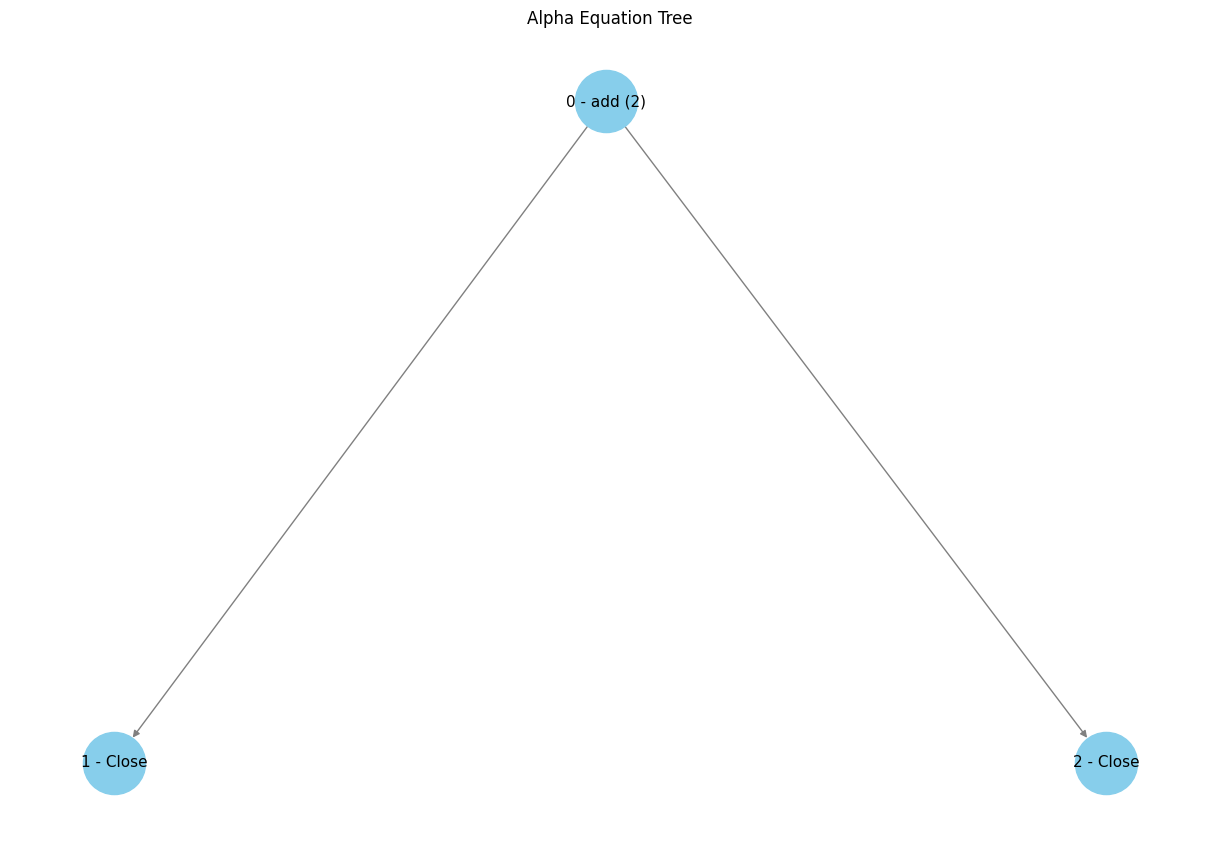

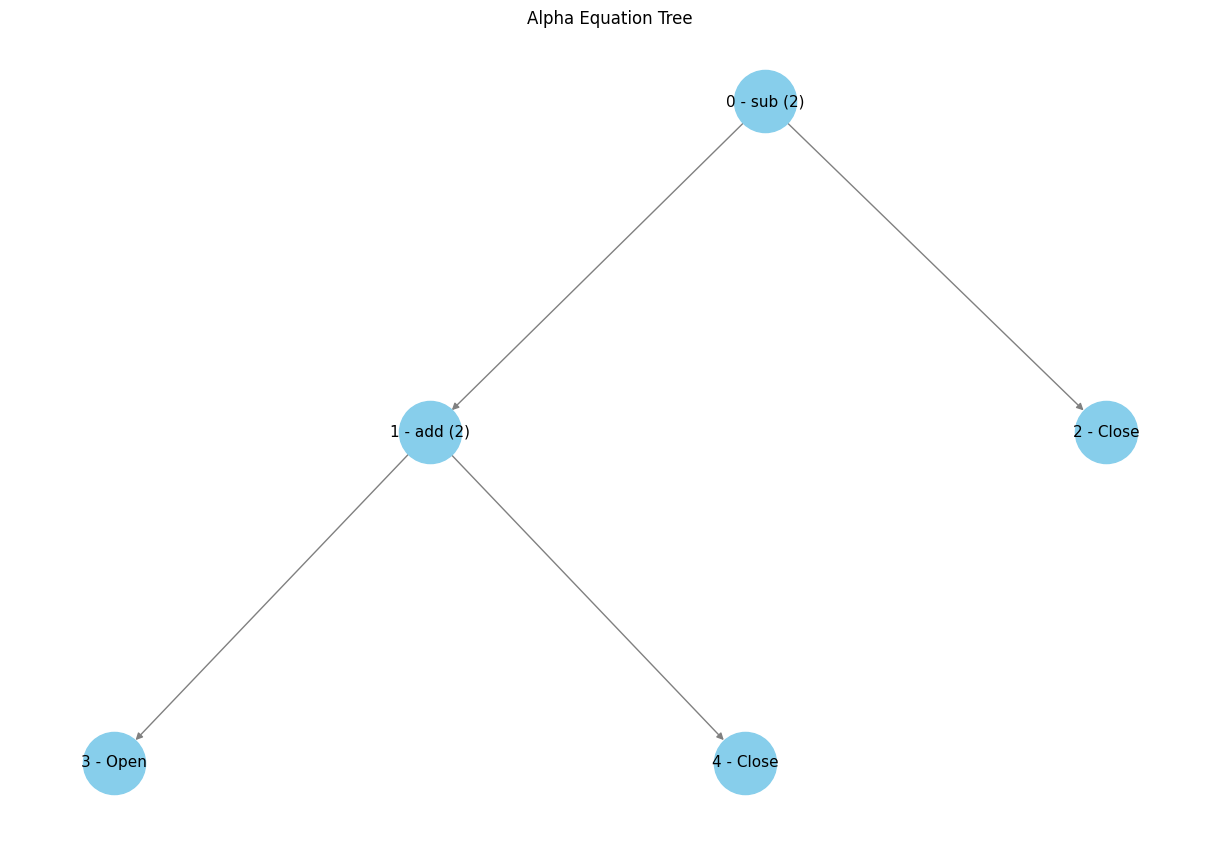

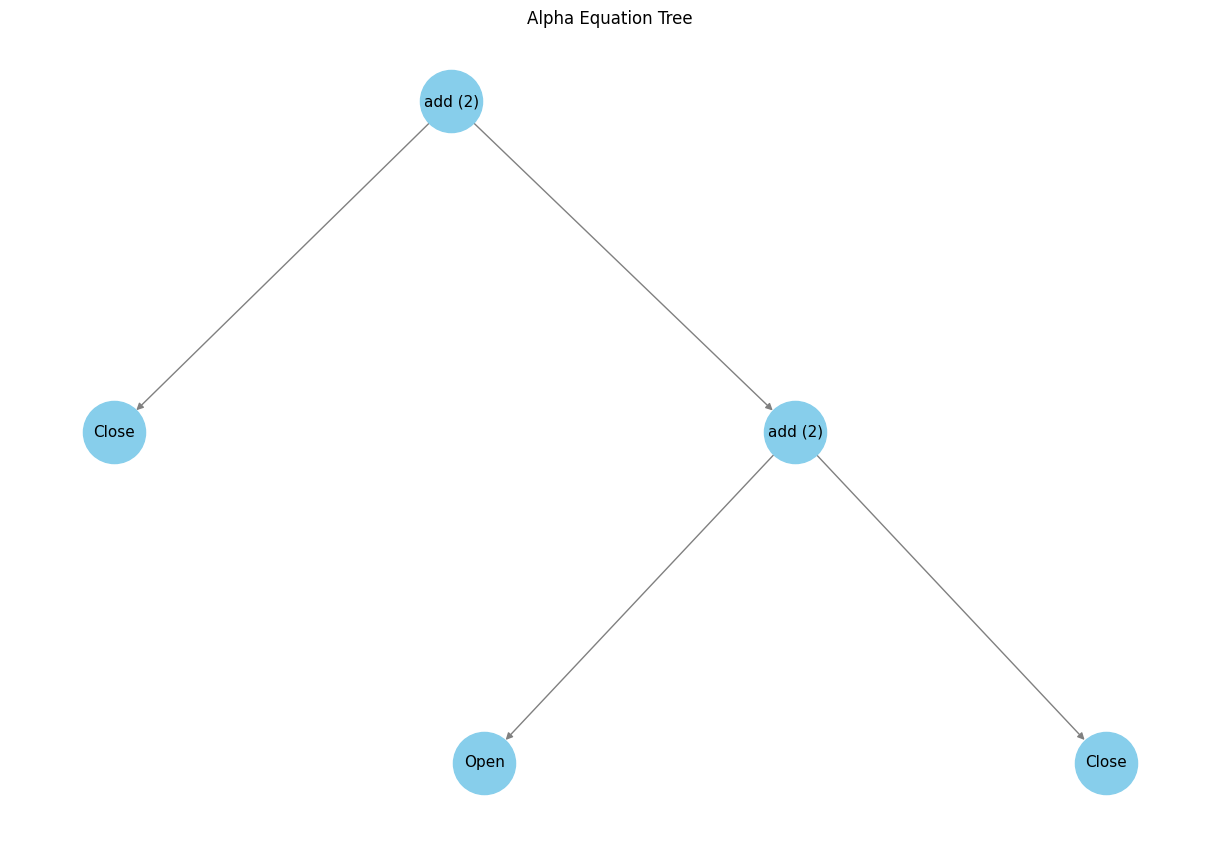

In [9]:
import genalfa
import genalfa._alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3),
    agid="alpha1"
)
alpha2 = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=4,
    variable_names=["Open", "Close", "High", "Close"],
    constant_range=None,
    init_depth=(2, 3),
    agid="alpha2"
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
)

of = cobj.produce_best_offspring(data=df)
alpha1.represent_alpha_as_graph_with_id()
alpha2.represent_alpha_as_graph_with_id()
of.represent_alpha_as_graph()

In [ ]:
def determine_phase(current_generation, max_generations):
    # Calculate the phase thresholds
    exploration_threshold = 0.2 * max_generations
    balance_threshold = 0.6 * max_generations
    exploitation_threshold = 0.9 * max_generations

    # Determine the phase
    if current_generation <= exploration_threshold:
        return "Exploration Phase"
    elif current_generation <= balance_threshold:
        return "Balance Phase"
    elif current_generation <= exploitation_threshold:
        return "Exploitation Phase"
    else:
        return "Convergence Phase"

# Example usage
max_generations = 100
for generation in range(1, max_generations + 1):
    phase = determine_phase(generation, max_generations)
    print(f"Generation {generation}: {phase}")


In [ ]:
from genalfa._mutate_object import MutationProbability

print(MutationProbability())

In [ ]:
import genalfa
# import genalfa.alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

def display_digraph(graph: nx.DiGraph, node_color='skyblue', edge_color='gray', font_size=10):
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("The input graph must be a networkx.DiGraph instance.")
    
    # Use Graphviz layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000,
        node_color=node_color,
        edge_color=edge_color,
        font_size=font_size,
        arrows=True,
        arrowsize=20,
    )
    
    # Show the plot
    plt.title("Directed Graph Visualization")
    plt.show()

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

df = pd.read_parquet("./alpha_mine_data.parquet")
df['Intra_diff'] = df['Intra_diff'].shift(-1)

alpha1 = utils.convert_string_to_alpha(
    agid="alpha1",
    functions={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    expression="add(High, sub(Open, Close))",
)
alpha2 = obj.make_alpha(
    agid="alpha2",
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    init_depth=(2, 3),
    # init_method=None
)

cobj = utils.coupling(
    parentX=alpha1,
    parentY=alpha2,
)

of1, of2 = cobj.produce_twins()

alpha1.represent_alpha_as_graph_with_id()
alpha2.represent_alpha_as_graph_with_id()

# of1.represent_alpha_as_graph_with_id()
# of2.represent_alpha_as_graph_with_id()
of1.fix()
of2.fix()
of1.represent_alpha_as_graph_with_id()
of2.represent_alpha_as_graph_with_id()

# alpha1.represent_alpha_as_graph_with_id()
# alpha2.represent_alpha_as_graph_with_id()

In [ ]:
from genalfa._mutate_object import _MutationProbability, _MutationStage, _MutationType

MutationStage = _MutationStage

def determine_phase(current_generation, max_generations):
    # Determine the current stage based on the generation
    exploration_factor = max(0.1, 1 - (current_generation / max_generations))
    exploitation_factor = 1 - exploration_factor

    if current_generation < max_generations * 0.2:
        stage = MutationStage.EXPLORATION
    elif current_generation < max_generations * 0.4:
        stage = MutationStage.MID
    elif current_generation < max_generations * 0.6:
        stage = MutationStage.EXPLOITATION
    elif current_generation < max_generations * 0.8:
        stage = MutationStage.NEAR_END
    else:
        stage = MutationStage.FINAL

    return stage.value, exploration_factor, exploitation_factor

current_generation = 0
max_generations = 100

while current_generation < max_generations:
    phase = determine_phase(current_generation, max_generations)
    print(f"Generation {current_generation + 1}: {phase}")
    current_generation += 1


Building Random Alpha based on the initial method.
Max Depth:  3
Alpha Initialized.
Method:  complete
Root Node:  Function: sub
Arity: 2
Node Added to Graph
Node Key:  0
Node:  Function: sub
Arity: 2
Root Node Key:  0
Building the alpha iteratively.
Current Node Key:  0
Arity:  2
Current Node Key:  0
Current Depth:  0
Is Terminal:  False
Child Node:  Function: add
Arity: 2
Node Added to Graph
Node Key:  1
Node:  Function: add
Arity: 2
Child Node Key:  1
Edge Added.
Child Node is a Function.
Current Node Key:  0
Current Depth:  0
Is Terminal:  False
Child Node:  Function: sub
Arity: 2
Node Added to Graph
Node Key:  2
Node:  Function: sub
Arity: 2
Child Node Key:  2
Edge Added.
Child Node is a Function.
Current Node Key:  2
Arity:  2
Current Node Key:  2
Current Depth:  1
Is Terminal:  False
Child Node:  Function: add
Arity: 2
Node Added to Graph
Node Key:  3
Node:  Function: add
Arity: 2
Child Node Key:  3
Edge Added.
Child Node is a Function.
Current Node Key:  2
Current Depth:  1
Is T

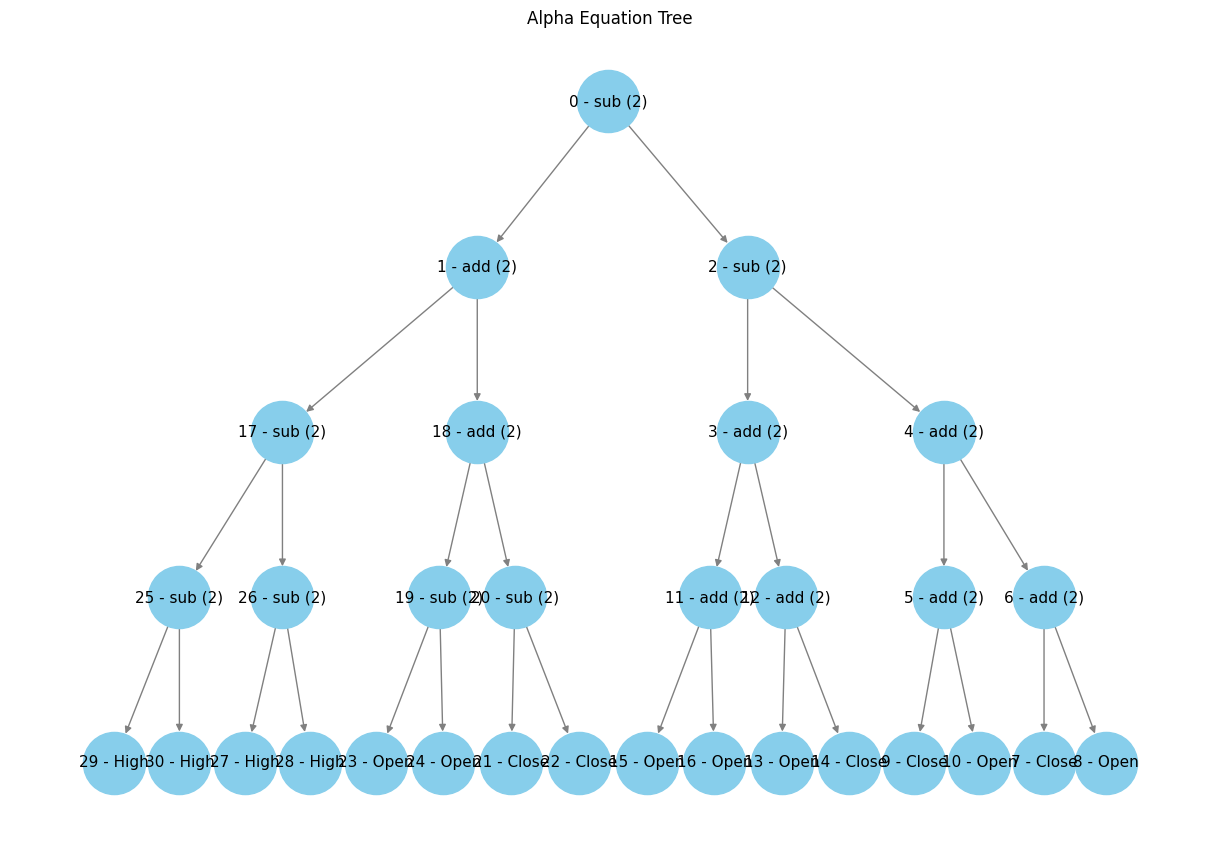

In [4]:
import genalfa
import genalfa._alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx


def add(a, b):
    return a + b
def sub(a, b):
    return a - b

alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    init_depth=(2, 3),
    debug=True,
    agid=""
)

# display_digraph(alpha)
alpha.represent_alpha_as_graph_with_id()

In [ ]:
G, att = alpha._get_random_subtree_along_with_attributes()
G.nodes, att

In [ ]:
alpha.replace_subtree(
    node=list(G.nodes)[0],
    subtree=G,
    attributes=att
)

In [ ]:
alpha.represent_alpha_as_graph_with_id()

In [ ]:
alpha.validate_alpha()

In [ ]:
alpha.represent_alpha_as_string()

In [ ]:
alpha.get_all_nodes_list(), alpha.get_all_nodes_list_except_root()

In [ ]:
import genalfa
import genalfa.alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx


def add(a, b):
    return a + b
def sub(a, b):
    return a - b

alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    init_depth=(2, 3),
    # debug=True
)

# display_digraph(alpha)
print(alpha.represent_alpha_as_string())
alpha.represent_alpha_as_graph_with_id()


G, att = alpha._get_random_subtree_along_with_attributes()

alpha.replace_subtree(
    node=list(G.nodes)[0],
    subtree=G,
    attributes=att
)

print(alpha.represent_alpha_as_string())
alpha.represent_alpha_as_graph_with_id()

In [ ]:
import genalfa
import genalfa.alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import random

def add(a, b):
    return a + b
def sub(a, b):
    return a - b

alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    init_depth=(2, 3),
    # debug=True
)

alpha.represent_alpha_as_graph_with_id()

alpha.replace_node_with_node(
    node=random.choice(list(alpha.get_all_function_nodes_list_except_root())),
    new_node=alpha._get_random_terminal_node(),
    debugging=True
)

alpha.represent_alpha_as_graph_with_id()

In [ ]:
import genalfa
import genalfa.alverse as alverse
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import random


def add(a, b):
    return a + b
def sub(a, b):
    return a - b

alpha = obj.make_alpha(
    function_set={
        "add": (2, add),
        "sub": (2, sub)
    },
    n_variable=3,
    variable_names=["Open", "Close", "High"],
    constant_range=None,
    init_depth=(2, 3),
    # debug=True
)

mutation = utils.evolve(
    alpha=alpha,
    current_generation=2,
    max_generation=10,
    debug=True
)
alpha.represent_alpha_as_graph_with_id()

In [ ]:
mutation.deletion_mutation()
ma = mutation.get_mutated_alpha()
ma.represent_alpha_as_graph_with_id()

In [ ]:
mutation.get_mutation_type()

In [ ]:
import genalfa
import genalfa.genetic as genetic
import genalfa.object as obj
import genalfa.utils as utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

In [ ]:
df = pd.DataFrame(columns=pd.Index(["Open", "Close", "High", "Low", "Volume", "Intra_diff"]))
df.loc[0] = [1, 2, 3, 4, 5, 6]
df

In [ ]:
print(type(- np.Infinity))

In [9]:
from enum import Enum
from pydantic import BaseModel, ConfigDict
from typing import List

class MutationType(Enum):
    DELETION = "Deletion"
    ADDITION = "Addition"
    REPLACEMENT = "Replacement"
    SWAP = "Swap"

class OOPS:
    def __init__(self):
        self._mutation_type = MutationType.DELETION
    def __str__(self):
        return "Hi, I am an OOPS object."
    def get(self, x, y):
        return x + y
    
class DataBase(BaseModel):
    id: int
    num: float
    Type: List[MutationType]
    test: OOPS

    model_config = ConfigDict(arbitrary_types_allowed=True)

In [5]:
data = [{
    "id": 1,
    "num": 2.3,
    "Type" : [MutationType.ADDITION, MutationType.DELETION, MutationType.REPLACEMENT, MutationType.SWAP],
    "test": OOPS()
}]

validate = [DataBase(**d).model_dump() for d in data]
# print(validate)

df = pd.DataFrame(validate)
df = df.set_index("id")

In [ ]:
df

In [ ]:
df["test"].values[0].get(x=2, y=3)

In [80]:
# Preparing for saving the DataFrame
df["Type"] = df["Type"].apply(lambda x: [y.value for y in x])

In [ ]:
df

In [82]:
df.to_csv("./tmp.csv", index=True, index_label="id")

In [54]:
df = pd.read_csv(filepath_or_buffer="./tmp.csv", usecols=["id", "num", "Type"], converters={
    "id": lambda x: int(x),
    "num": lambda x: float(x),
    "Type": lambda x: [MutationType(i.strip()[1:-1]) for i in x[1:-1].split(",")]
})
df = df.set_index(keys="id", drop=True)
# df["Type"] = df["Type"].apply(lambda x: [MutationType(i.strip()[1:-1]) for i in x[1:-1].split(",")] )

In [ ]:
df

In [ ]:
df["Type"].values[0]

In [ ]:
df.info()

In [ ]:
for i in df["Type"].values[0]:
    print(i, type(i))